In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import regex as re

In [2]:
from result_utils import read_results_task

#### Plot

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (8.2,4.8)

In [4]:
colors = ['#fc8d62', '#8da0cb']
legend = ['unfamiliar', 'familiar']

In [5]:
legend_fontsize = 18
legend_offset = 0.15
legend_offset_model = 0.27

##### Generation

In [6]:
models = ['T5-base', 'T5-small', 'BART']

In [7]:
results = read_results_task('gen', models)

In [8]:
gen_metrics = ['rougeL_precision', 'bert_precision', 'bleu_precision']
display_metrics = ['Rouge-L', 'Bertscore', 'BLEU']
axes = ['accurate', 'incongruous', 'nonfactual']

In [9]:
def plot_generation(gen_metrics, display_metrics):    
    
    for c, metric in enumerate(gen_metrics):
    
        fig = plt.figure()
        ax = fig.add_subplot(111)

        for j, model_name in enumerate(models):

            offset = j*4

            res_unknown = results[model_name][metric]['unknown']
            for idx in range(3):
                plt.bar(offset+idx-0.2+1, res_unknown[idx], width=0.4, color=colors[0])

            res_known = results[model_name][metric]['known']
            for idx in range(3):
                plt.bar(offset+idx+0.2+1, res_known[idx], width=0.4, color=colors[1])


            res = [max(i, j) for i, j in zip(res_unknown, res_known)]
            sig = results[model_name][metric]['significance']
            sig = [u'\u2605\u2605' if i==0.005  else u'\u2605' if i==0.05 else '' for i in sig]

            for idx in range(3):
                plt.text(offset+idx-0.2+1, res_unknown[idx], f'{sig[idx]}', 
                             ha='center', va='bottom', fontsize=11)


            # res = results[metric]['overall']
            # print(res)
            # for idx in range(3):
            #     ax.hlines(y=res[idx], xmin=idx-0.25+1, xmax=idx+0.25+1, linestyle='--', color='black')

        ax.set_xticks([i+j*4 for j in range(3) for i in range(1, 4)])
        if 'Rank' in display_metrics[c]:
            ax.set_xticklabels(axes*3)
            plt.xticks(fontsize=14, rotation=90)
        else:
            ax.set_xticklabels(['']*9)
            
        if 'Precision' in display_metrics[c]:
            plt.legend(legend, prop={'size': legend_fontsize}, loc='upper center', bbox_to_anchor=(0.5, 1 + legend_offset_model), ncol=3, handletextpad=0.3, frameon=False)
            leg = ax.get_legend()
            leg.legendHandles[0].set_color(colors[0])
            leg.legendHandles[1].set_color(colors[1])

        plt.ylabel(display_metrics[c])

        ax2 = ax.twiny()
        ax2.set_xlim(0, 12)
        ax2.set_xticks([2, 6, 10])
        ax2.set_xticklabels(models)

        plt.savefig(f'figures/gen_{metric.replace(":", "_")}.pdf', bbox_inches='tight')
        
    return 
    

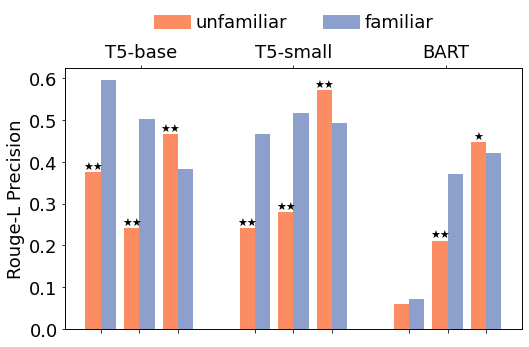

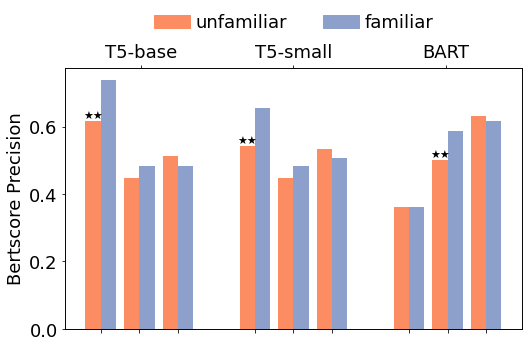

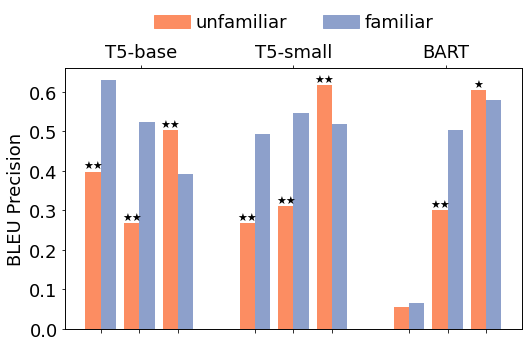

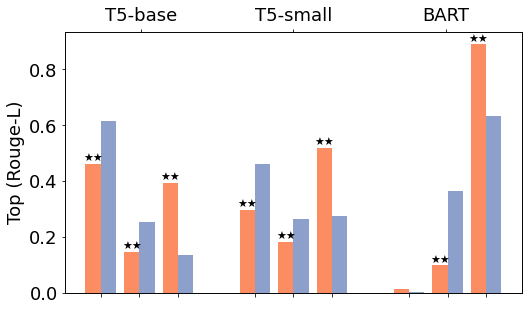

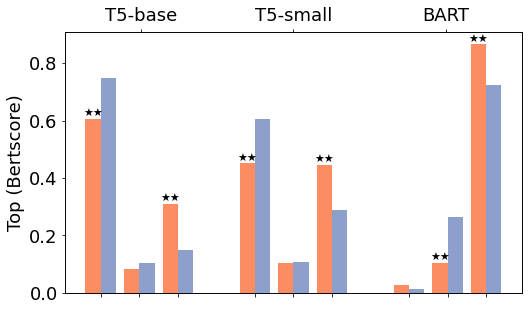

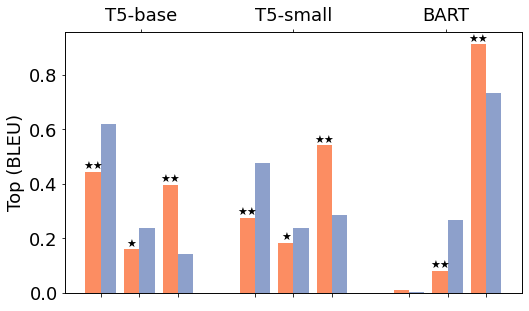

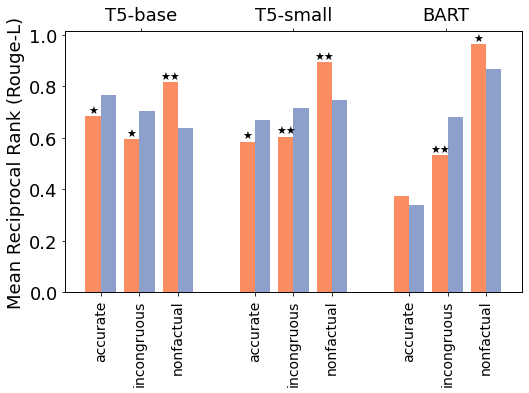

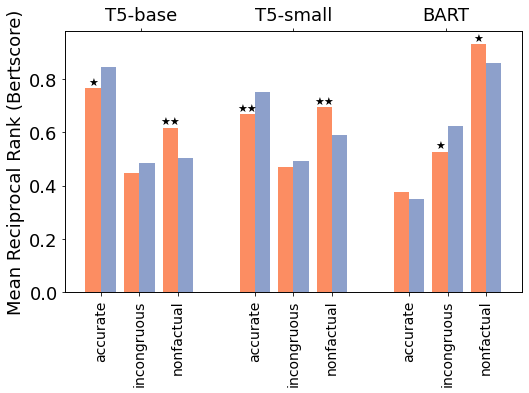

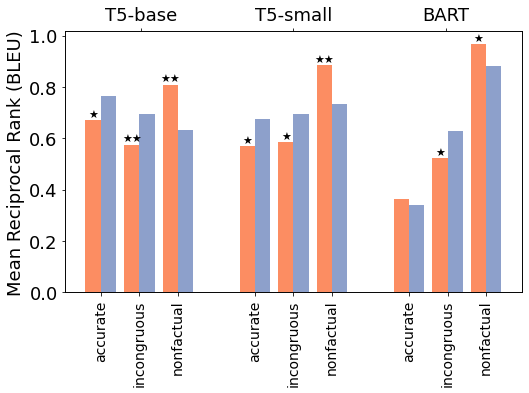

In [10]:
plot_generation(gen_metrics, [f'{i} Precision' for i in display_metrics])
plot_generation([f'{i}:Top' for i in gen_metrics], [f'Top ({i})' for i in display_metrics])
plot_generation([f'{i}:MRR' for i in gen_metrics], [f'Mean Reciprocal Rank ({i})' for i in display_metrics])

In [11]:
def plot_generation_single(gen_metrics, display_metrics):
    model_name = 'T5-base'
    for c, metric in enumerate(gen_metrics):
    
        fig = plt.figure()
        ax = fig.add_subplot(111)
            
        res_unknown = results[model_name][metric]['unknown']
        for idx in range(3):
            plt.bar(idx-0.2+1, res_unknown[idx], width=0.4, color=colors[0])

        res_known = results[model_name][metric]['known']
        for idx in range(3):
            plt.bar(idx+0.2+1, res_known[idx], width=0.4, color=colors[1])
            
            
        res = [max(i, j) for i, j in zip(res_unknown, res_known)]
        sig = results[model_name][metric]['significance']
        sig = [u'\u2605\u2605' if i==0.005  else u'\u2605' if i==0.05 else '' for i in sig]
        # sig = [f'p<{i}' if i!=-1 else '' for i in sig]
        
        for idx in range(3):
            plt.text(idx-0.2+1, res_unknown[idx], f'{sig[idx]}', 
                         ha='center', va='bottom', fontsize=11)


            # res = results[metric]['overall']
            # print(res)
            # for idx in range(3):
            #     ax.hlines(y=res[idx], xmin=idx-0.25+1, xmax=idx+0.25+1, linestyle='--', color='black')

        ax.set_xticks(range(1, 4))
        ax.set_xticklabels(axes)

        plt.ylabel(display_metrics[c])
        plt.legend(legend, prop={'size': legend_fontsize}, loc='upper center', bbox_to_anchor=(0.5, 1 + legend_offset), ncol=3, handletextpad=0.3, frameon=False)
        leg = ax.get_legend()
        leg.legendHandles[0].set_color(colors[0])
        leg.legendHandles[1].set_color(colors[1])
        
        plt.savefig(f'figures/gen_{model_name}_{metric.replace(":", "_")}.pdf', bbox_inches='tight')

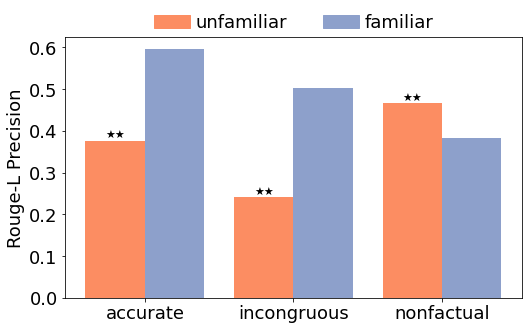

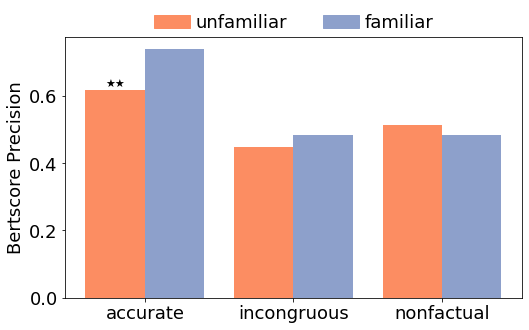

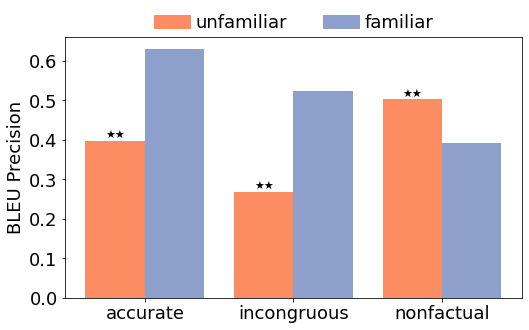

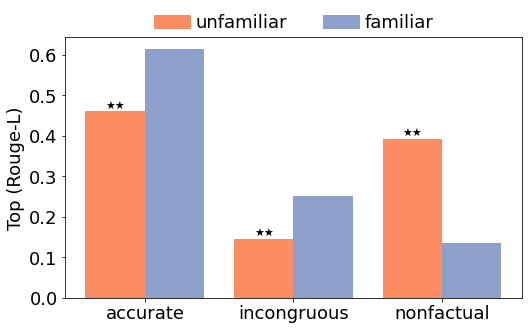

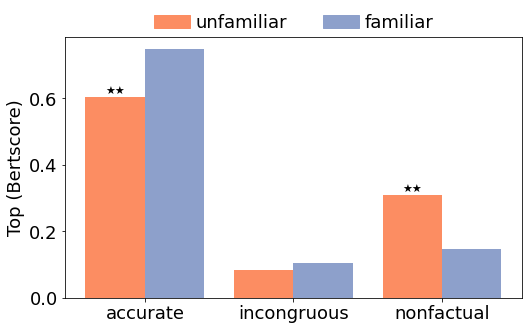

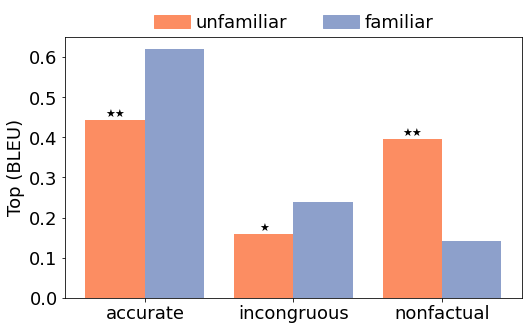

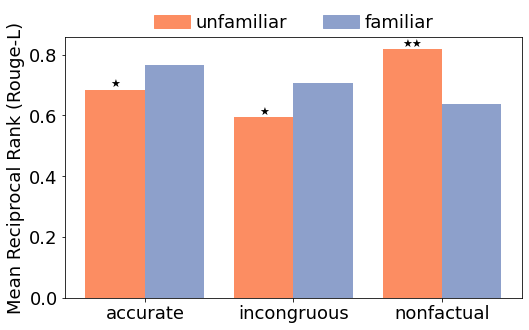

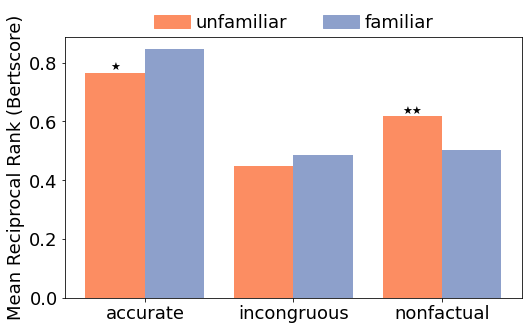

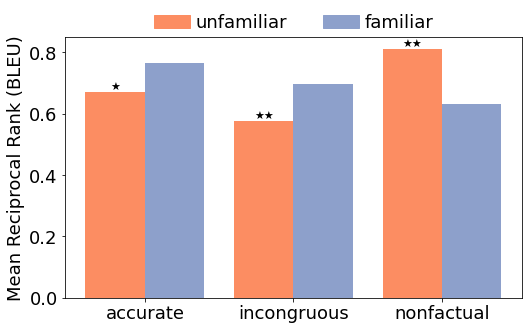

In [12]:
plot_generation_single(gen_metrics, [f'{i} Precision' for i in display_metrics])
plot_generation_single([f'{i}:Top' for i in gen_metrics], [f'Top ({i})' for i in display_metrics])
plot_generation_single([f'{i}:MRR' for i in gen_metrics], [f'Mean Reciprocal Rank ({i})' for i in display_metrics])

##### Identification 

In [13]:
models_ident = ['BERT', 'RoBERTa', 'Electra']

In [14]:
ident_metrics = ['Top', 'MRR']
axes = ['accurate', 'incongruous', 'nonfactual', 'both']
display_metrics = ['Top', 'Mean Reciprocal Rank']

In [15]:
# results = read_results_task('claim', models_ident)

In [16]:
def plot_ident(results, task):
    for c, metric in enumerate(ident_metrics):

        fig = plt.figure()
        ax = fig.add_subplot(111)

        for j, model_name in enumerate(models_ident):

            offset = j*5

            res_unknown = results[model_name][metric]['unknown']
            for idx in range(4):
                plt.bar(offset+idx-0.2+1, res_unknown[idx], width=0.4, color=colors[0])

            res_known = results[model_name][metric]['known']
            
            for idx in range(4):
                bar = plt.bar(offset+idx+0.2+1, res_known[idx], width=0.4, color=colors[1])
                
            res = [max(i, j) for i, j in zip(res_unknown, res_known)]
            sig = results[model_name][metric]['significance']
            sig = [u'\u2605\u2605' if i==0.005  else u'\u2605' if i==0.05 else '' for i in sig]
            for idx in range(4):
                plt.text(offset+idx-0.2+1, res_unknown[idx], f'{sig[idx]}', 
                         ha='center', va='bottom', fontsize=8)


            # res = results[metric]['overall']
            # print(res)
            # for idx in range(3):
            #     ax.hlines(y=res[idx], xmin=idx-0.25+1, xmax=idx+0.25+1, linestyle='--', color='black')


        ax.set_xticks([i+j*5 for j in range(3) for i in range(1, 5)])
        if ident_metrics[c]=='Top':
            ax.set_xticklabels(['']*12)
        else:
            ax.set_xticklabels(axes*3)

        plt.ylabel(display_metrics[c])
        plt.xticks(rotation=90)


        plt.legend(legend, prop={'size': legend_fontsize}, loc='upper center', bbox_to_anchor=(0.5, 1 + legend_offset_model), ncol=3, handletextpad=0.3, frameon=False)
        leg = ax.get_legend()
        leg.legendHandles[0].set_color(colors[0])
        leg.legendHandles[1].set_color(colors[1])

        ax2 = ax.twiny()
        ax2.set_xlim(0, 16)
        ax2.set_xticks([2.5, 7.5, 13.5])
        ax2.set_xticklabels(models_ident)

        plt.savefig(f'figures/{task}id_{metric}.pdf', bbox_inches='tight')

In [17]:
model_name = 'RoBERTa'
# model_name = 'BERT'

def plot_ident_single(results, task):

    for c, metric in enumerate(ident_metrics):

        fig = plt.figure()
        ax = fig.add_subplot(111)


        res_unknown = results[model_name][metric]['unknown']
        for idx in range(4):
            plt.bar(idx-0.2+1, res_unknown[idx], width=0.4, color=colors[0])

        res_known = results[model_name][metric]['known']
        for idx in range(4):
            plt.bar(idx+0.2+1, res_known[idx], width=0.4, color=colors[1])
            
            
        res = [max(i, j) for i, j in zip(res_unknown, res_known)]
        sig = results[model_name][metric]['significance']
        sig = [u'\u2605\u2605' if i==0.005  else u'\u2605' if i==0.05 else '' for i in sig]
        # sig = [f'p<{i}' if i!=-1 else '' for i in sig]
        
        for idx in range(4):
            plt.text(idx-0.2+1, res_unknown[idx], f'{sig[idx]}', 
                         ha='center', va='bottom', fontsize=11)


            # res = results[metric]['overall']
            # print(res)
            # for idx in range(3):
            #     ax.hlines(y=res[idx], xmin=idx-0.25+1, xmax=idx+0.25+1, linestyle='--', color='black')


        ax.set_xticks(range(1, 5))
        ax.set_xticklabels(axes)
        # plt.xticks(rotation=15)
        plt.ylabel(display_metrics[c])


        plt.legend(legend, prop={'size': legend_fontsize}, loc='upper center', bbox_to_anchor=(0.5, 1 + legend_offset), ncol=3, handletextpad=0.3, frameon=False)
        leg = ax.get_legend()
        leg.legendHandles[0].set_color(colors[0])
        leg.legendHandles[1].set_color(colors[1])

        plt.savefig(f'figures/{task}id_{model_name}_{metric}.pdf', bbox_inches='tight')

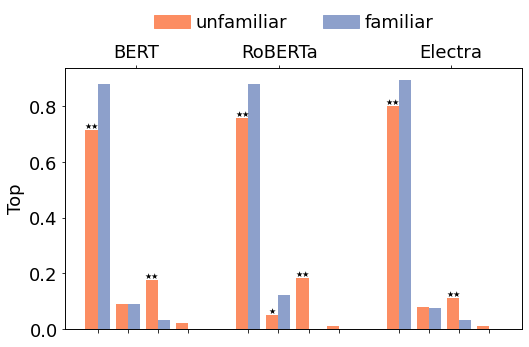

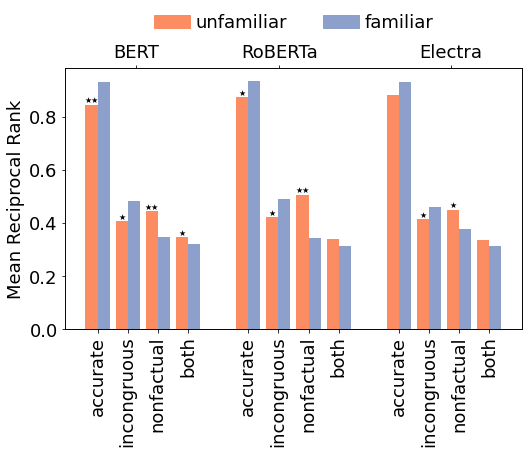

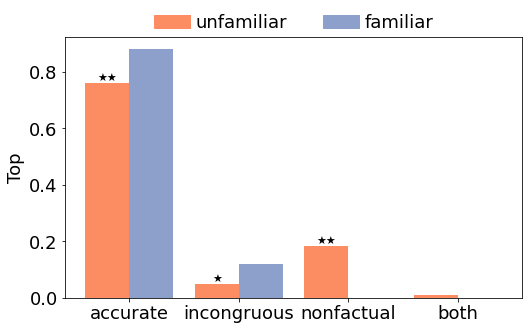

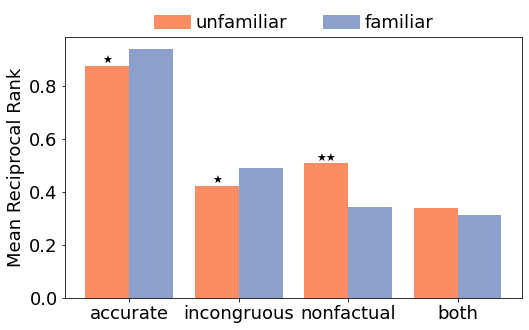

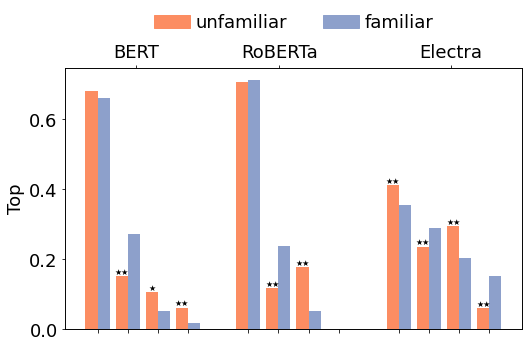

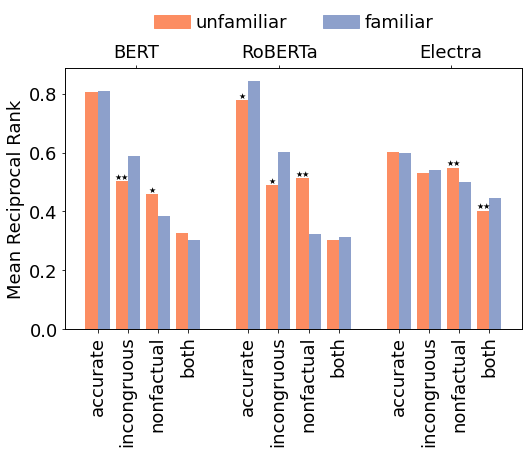

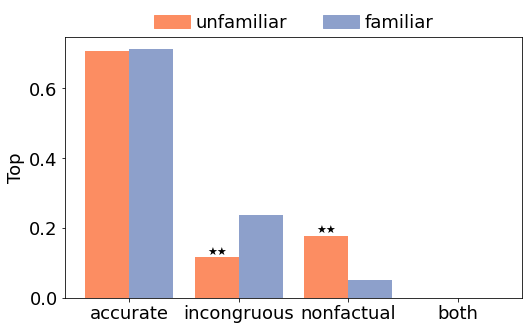

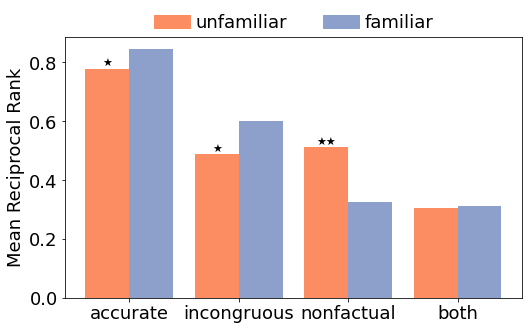

In [18]:
for task in ['claim', 'desc']:
    results = read_results_task(task, models_ident)
    plot_ident(results, task)
    plot_ident_single(results, task)